<a href="https://colab.research.google.com/github/iamab3/Scan-Analysis---Finding-Center-using-Variance-and-Spread/blob/main/Finding_Centre_for_FE_and_DE_Slices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
start = time.perf_counter()

In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Reading DE Slice file and Plotting it.

In [ ]:
# 1. Read the file
# Replace 'your_file.txt' with your actual filename
file_path = '/content/DE_Slice.txt'
DE_df = pd.read_csv(file_path, sep='\s+', header=None, usecols=[0, 1, 2], names=['X', 'Y', 'Z'])

# 2. Display the first 5 rows
print("First 5 rows of the data:")
print(DE_df.head())
print("\n")

First 5 rows of the data:
          X         Y         Z
0 -2.225155  2.943303  2.329207
1 -2.258240  2.940154  2.301198
2 -2.323245  2.941460  2.281260
3 -2.315259  2.940263  2.287242
4 -2.279241  2.940571  2.295218




<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2057459923.py:4: SyntaxWarning: invalid escape sequence '\s'
  DE_df = pd.read_csv(file_path, sep='\s+', header=None, usecols=[0, 1, 2], names=['X', 'Y', 'Z'])


In [ ]:
# 3. The columns are already extracted and named as X, Y, Z
print(f"Data shape: {DE_df.shape}")
print(f"Columns: {list(DE_df.columns)}")
print("\n")

Data shape: (5103, 3)
Columns: ['X', 'Y', 'Z']




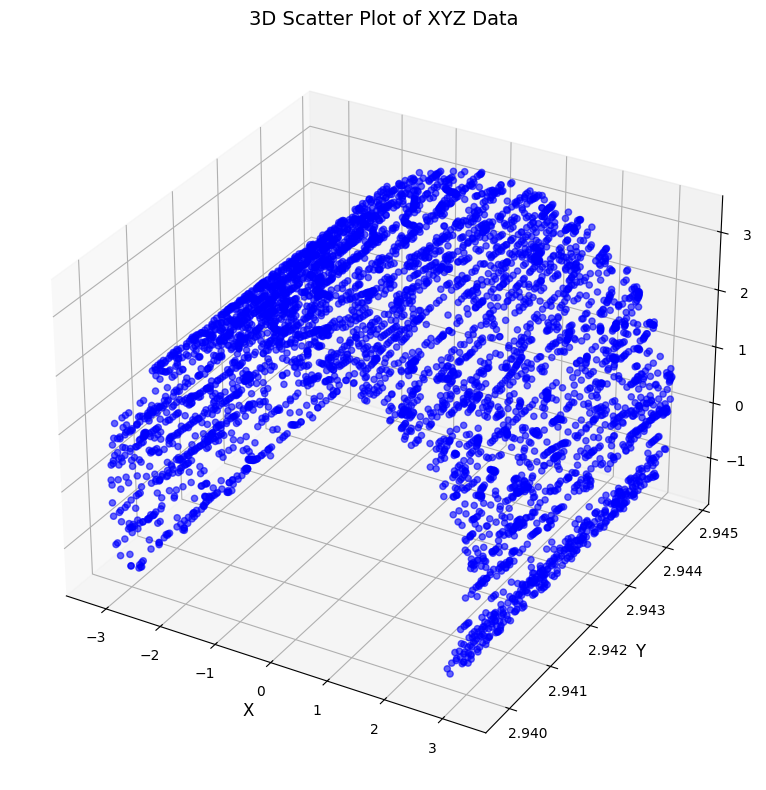

In [ ]:
# 4. Plot the data
fig1 = plt.figure(figsize=(10, 8))
ax1 = fig1.add_subplot(111, projection='3d')

# Create scatter plot
ax1.scatter(DE_df['X'], DE_df['Y'], DE_df['Z'], c='blue', marker='o', s=20, alpha=0.6)

# Labels and title
ax1.set_xlabel('X', fontsize=12)
ax1.set_ylabel('Y', fontsize=12)
ax1.set_zlabel('Z', fontsize=12)
ax1.set_title('3D Scatter Plot of XYZ Data', fontsize=14)

plt.tight_layout()
plt.show()

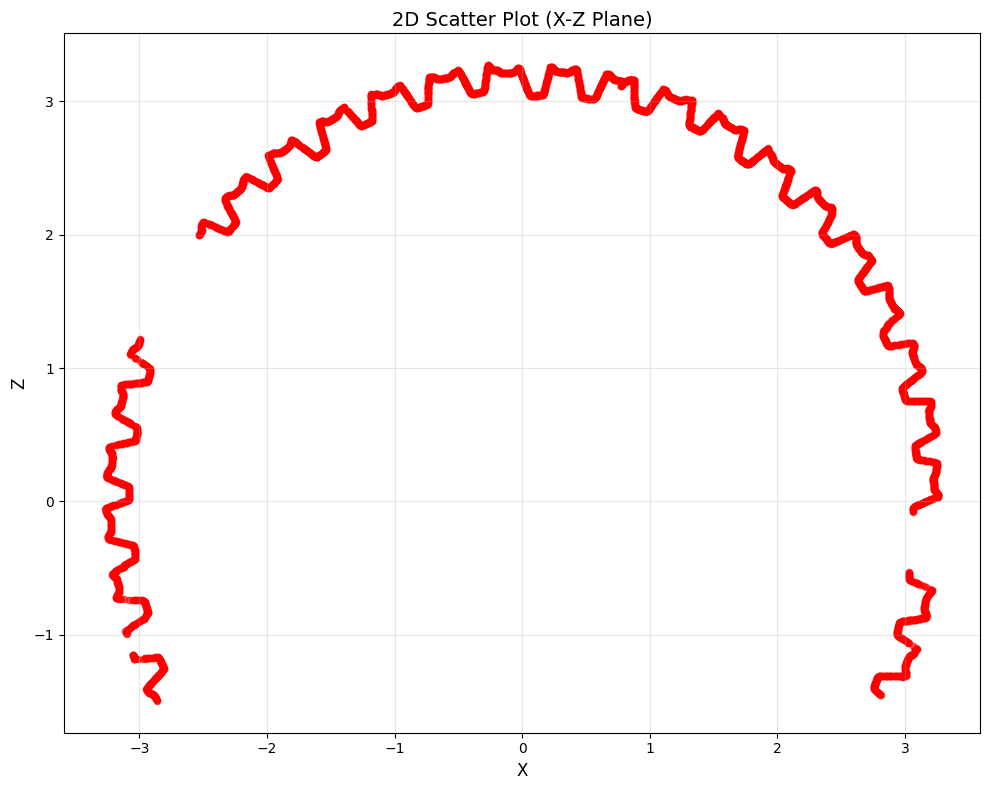

In [ ]:
# 2D Plot on X-Z plane
fig2 = plt.figure(figsize=(10, 8))
ax2 = fig2.add_subplot(111)
ax2.scatter(DE_df['X'], DE_df['Z'], c='red', marker='o', s=20, alpha=0.6)
ax2.set_xlabel('X', fontsize=12)
ax2.set_ylabel('Z', fontsize=12)
ax2.set_title('2D Scatter Plot (X-Z Plane)', fontsize=14)
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Converting all coordinates from m to mm.

In [ ]:
conversion_factor = 1000
DE_df[['X', 'Y', 'Z']] = DE_df[['X', 'Y', 'Z']] * conversion_factor
DE_df[['X', 'Y', 'Z']] = DE_df[['X', 'Y', 'Z']].round(2)

DE_df.head()

,X,Y,Z
0,-2225.16,2943.30,2329.21
1,-2258.24,2940.15,2301.20
2,-2323.25,2941.46,2281.26
3,-2315.26,2940.26,2287.24
4,-2279.24,2940.57,2295.22


Finding the DE Slice center by minimising distance

In [ ]:
# Importing libraries
import numpy as np
from scipy.optimize import minimize

In [ ]:
# Define the objective function: minimize variance of distances (to make all distances equal)
def distance_variance(center, points):
    """
    Calculate variance of distances from center to all points in X-Z plane
    This finds a center that is as equidistant as possible from all points
    center: [x_center, z_center]
    points: dataframe with X and Z columns
    """
    x_c, z_c = center
    distances = np.sqrt((points['X'] - x_c)**2 + (points['Z'] - z_c)**2)
    return np.var(distances)

# Also define a function to calculate standard deviation of distances
def distance_std(center, points):
    """
    Calculate standard deviation of distances from center to all points
    """
    x_c, z_c = center
    distances = np.sqrt((points['X'] - x_c)**2 + (points['Z'] - z_c)**2)
    return np.std(distances)

In [ ]:
# Initial guess for center (mean of X and Z)
initial_center = [DE_df['X'].mean(), DE_df['Z'].mean()]
print(f"Initial Center: {initial_center[0]:.2f}, {initial_center[1]:.2f}")

Initial Center: 260.25, 1647.36


In [ ]:
# Optimize to find the best center
result = minimize(distance_variance, initial_center, args=(DE_df,), method='BFGS')
optimal_center = result.x

# Calculate statistics at optimal center
x_c, z_c = optimal_center
distances_at_optimal = np.sqrt((DE_df['X'] - x_c)**2 + (DE_df['Z'] - z_c)**2)

print(f"Optimal Center (Equidistant):")
print(f"X_center = {optimal_center[0]:.2f}")
print(f"Z_center = {optimal_center[1]:.2f}")
print(f"Standard deviation of distances = {distance_std(optimal_center, DE_df):.2f}")
print(f"Mean distance = {np.mean(distances_at_optimal):.2f}")
print(f"Min distance = {np.min(distances_at_optimal):.2f}")
print(f"Max distance = {np.max(distances_at_optimal):.2f}")
print("\n")

Optimal Center (Equidistant):
X_center = 11.66
Z_center = 4.23
Standard deviation of distances = 72.21
Mean distance = 3183.28
Min distance = 3037.55
Max distance = 3282.98




In [ ]:
# Define the objective function: minimize spread of distances (to find the minimum of (Max. distance - Min. distance))
def distance_spread(center, points):
    """
    Calculate spread by minimising the maximum and minimum distances from center to all points in X-Z plane
    This identifies a centre that minimises the difference between the maximum and minimum distances
    center: [x_center, z_center]
    points: dataframe with X and Z columns
    """
    x_c, z_c = center
    distances = np.sqrt((points['X'] - x_c)**2 + (points['Z'] - z_c)**2)
    return (np.max(distances) - np.min(distances))

In [ ]:
# Initial guess for center (mean of X and Z)
initial_center = [DE_df['X'].mean(), DE_df['Z'].mean()]
print(f"Initial Center: {initial_center[0]:.2f}, {initial_center[1]:.2f}")

Initial Center: 260.25, 1647.36


In [ ]:
# Optimize to find the best center
result = minimize(distance_spread, initial_center, args=(DE_df,), method='BFGS')
optimal_center = result.x

# Calculate statistics at optimal center
x_c, z_c = optimal_center
distances_at_optimal = np.sqrt((DE_df['X'] - x_c)**2 + (DE_df['Z'] - z_c)**2)

print(f"Optimal Center (Equidistant):")
print(f"X_center = {optimal_center[0]:.2f}")
print(f"Z_center = {optimal_center[1]:.2f}")
print(f"Standard deviation of distances = {distance_std(optimal_center, DE_df):.2f}")
print(f"Mean distance = {np.mean(distances_at_optimal):.2f}")
print(f"Min distance = {np.min(distances_at_optimal):.2f}")
print(f"Max distance = {np.max(distances_at_optimal):.2f}")
print("\n")

Optimal Center (Equidistant):
X_center = 15.62
Z_center = -3.66
Standard deviation of distances = 72.36
Mean distance = 3187.04
Min distance = 3045.35
Max distance = 3288.13




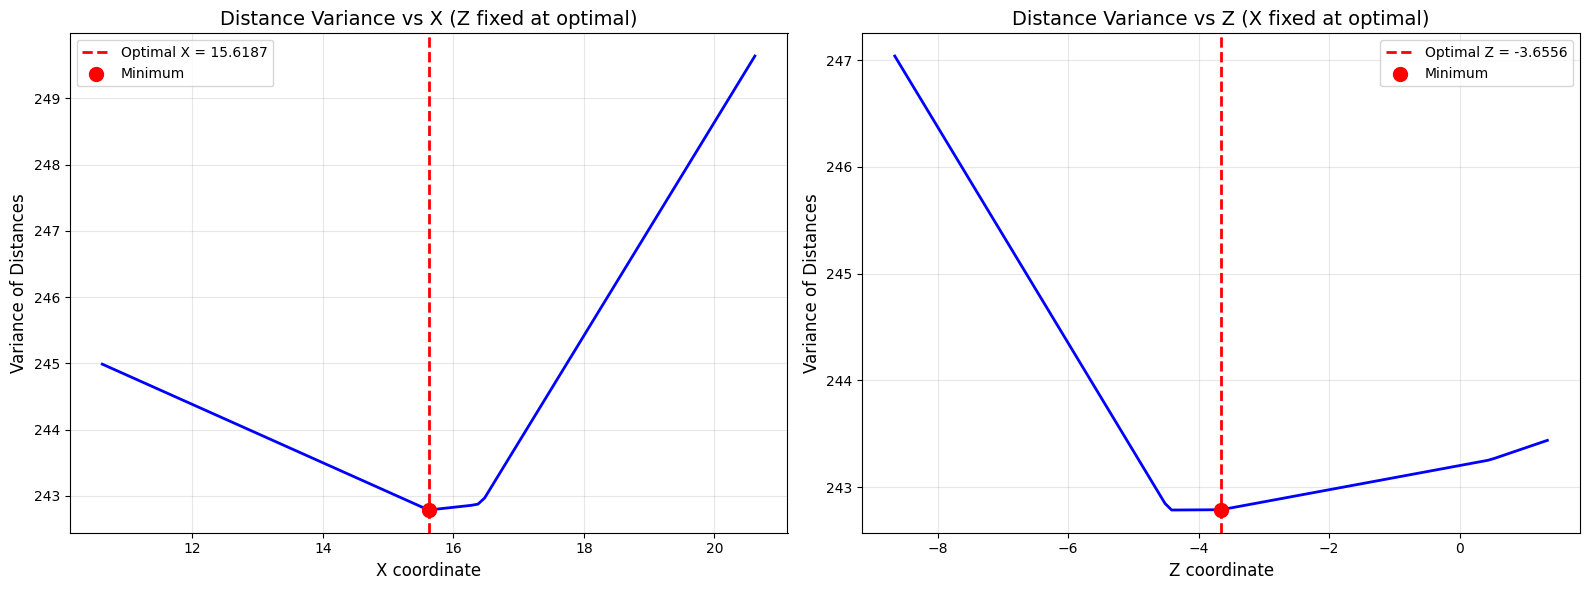

In [ ]:
# Create range of X and Z values around the optimal center for visualization
x_range = np.linspace(optimal_center[0] - 5, optimal_center[0] + 5, 100)
z_range = np.linspace(optimal_center[1] - 5, optimal_center[1] + 5, 100)

# Calculate distance variance for varying X (keeping Z at optimal)
variance_varying_x = [distance_spread([x, optimal_center[1]], DE_df) for x in x_range]

# Calculate distance variance for varying Z (keeping X at optimal)
variance_varying_z = [distance_spread([optimal_center[0], z], DE_df) for z in z_range]

# 1. Create graphs showing minima
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graph for X coordinate
axes[0].plot(x_range, variance_varying_x, 'b-', linewidth=2)
axes[0].axvline(x=optimal_center[0], color='r', linestyle='--', linewidth=2, label=f'Optimal X = {optimal_center[0]:.4f}')
axes[0].scatter([optimal_center[0]], [distance_spread(optimal_center, DE_df)], color='r', s=100, zorder=5, label='Minimum')
axes[0].set_xlabel('X coordinate', fontsize=12)
axes[0].set_ylabel('Variance of Distances', fontsize=12)
axes[0].set_title('Distance Variance vs X (Z fixed at optimal)', fontsize=14)
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Graph for Z coordinate
axes[1].plot(z_range, variance_varying_z, 'b-', linewidth=2)
axes[1].axvline(x=optimal_center[1], color='r', linestyle='--', linewidth=2, label=f'Optimal Z = {optimal_center[1]:.4f}')
axes[1].scatter([optimal_center[1]], [distance_spread(optimal_center, DE_df)], color='r', s=100, zorder=5, label='Minimum')
axes[1].set_xlabel('Z coordinate', fontsize=12)
axes[1].set_ylabel('Variance of Distances', fontsize=12)
axes[1].set_title('Distance Variance vs Z (X fixed at optimal)', fontsize=14)
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

Table 1: Distance Variance for varying X (Z fixed at optimal)
        X  Z (fixed)  Distance Variance  Distance Std Dev
13.618691  -3.655599         243.668032         72.317057
14.018691  -3.655599         243.491851         72.322885
14.418691  -3.655599         243.315656         72.329845
14.818691  -3.655599         243.139447         72.337938
15.218691  -3.655599         242.963223         72.347163
15.618691  -3.655599         242.786985         72.357521
16.018691  -3.655599         242.830314         72.369010
16.418691  -3.655599         242.902971         72.381630
16.818691  -3.655599         243.517844         72.395380
17.218691  -3.655599         244.162132         72.410260
17.618691  -3.655599         244.806450         72.426269


Table 2: Distance Variance for varying Z (X fixed at optimal)
 X (fixed)         Z  Distance Variance  Distance Std Dev
 15.618691 -5.655599         244.002182         72.409276
 15.618691 -5.255599         243.596903         72.397986
 15.

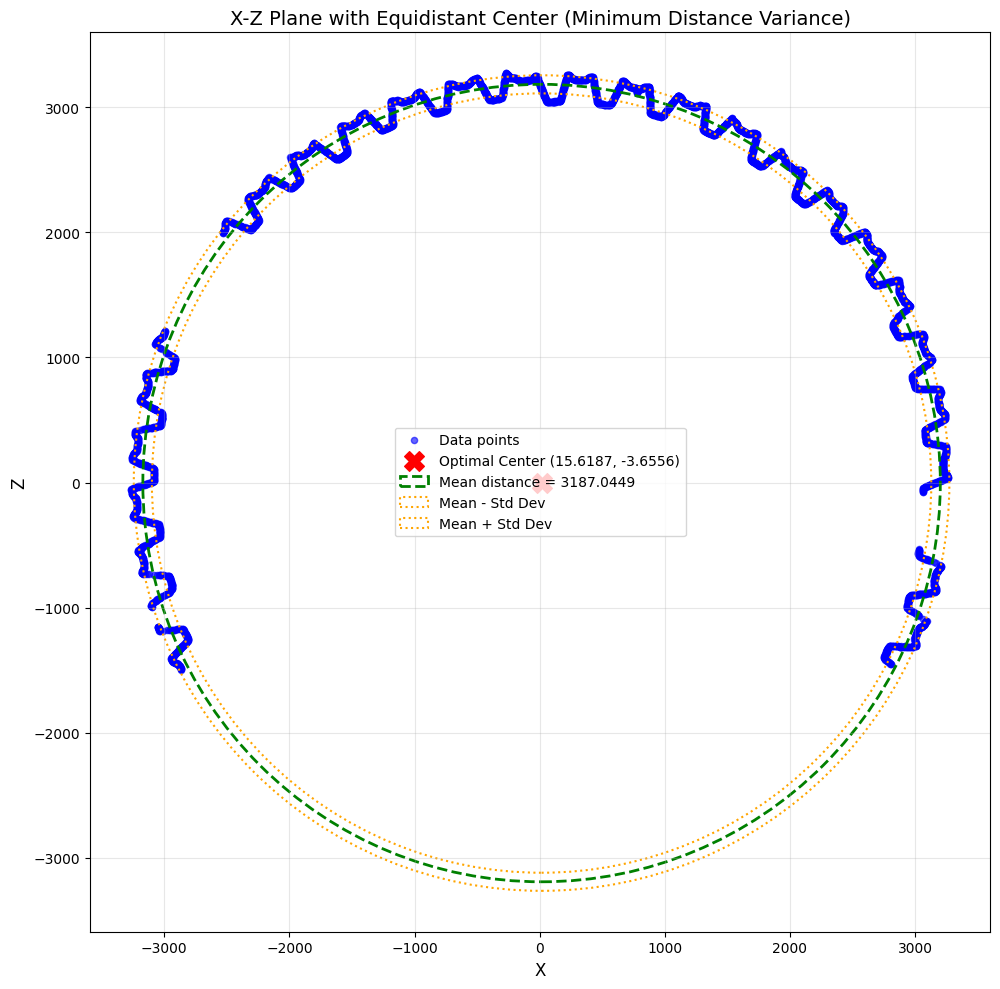

In [ ]:
# 2. Create table showing X and Z values
# Sample points around the optimal center
num_samples = 11
x_samples = np.linspace(optimal_center[0] - 2, optimal_center[0] + 2, num_samples)
z_samples = np.linspace(optimal_center[1] - 2, optimal_center[1] + 2, num_samples)

# Create table data for X variation
table_data_x = []
for x in x_samples:
    variance = distance_spread([x, optimal_center[1]], DE_df)
    std = distance_std([x, optimal_center[1]], DE_df)
    table_data_x.append({
        'X': x,
        'Z (fixed)': optimal_center[1],
        'Distance Variance': variance,
        'Distance Std Dev': std
    })

# Create table data for Z variation
table_data_z = []
for z in z_samples:
    variance = distance_spread([optimal_center[0], z], DE_df)
    std = distance_std([optimal_center[0], z], DE_df)
    table_data_z.append({
        'X (fixed)': optimal_center[0],
        'Z': z,
        'Distance Variance': variance,
        'Distance Std Dev': std
    })

DE_df_table_x = pd.DataFrame(table_data_x)
DE_df_table_z = pd.DataFrame(table_data_z)

print("="*80)
print("Table 1: Distance Variance for varying X (Z fixed at optimal)")
print("="*80)
print(DE_df_table_x.to_string(index=False))
print("\n")

print("="*80)
print("Table 2: Distance Variance for varying Z (X fixed at optimal)")
print("="*80)
print(DE_df_table_z.to_string(index=False))
print("\n")

# Visualize the optimal center on the X-Z plane with circles showing distances
fig3 = plt.figure(figsize=(12, 10))
ax3 = fig3.add_subplot(111)

# Plot data points
ax3.scatter(DE_df['X'], DE_df['Z'], c='blue', marker='o', s=20, alpha=0.6, label='Data points')

# Plot optimal center
ax3.scatter(optimal_center[0], optimal_center[1], c='red', marker='X', s=200,
           label=f'Optimal Center ({optimal_center[0]:.4f}, {optimal_center[1]:.4f})', zorder=5)

# Draw circles at mean distance ± std dev
mean_dist = np.mean(distances_at_optimal)
std_dist = np.std(distances_at_optimal)

circle1 = plt.Circle((optimal_center[0], optimal_center[1]), mean_dist,
                     color='green', fill=False, linestyle='--', linewidth=2, label=f'Mean distance = {mean_dist:.4f}')
circle2 = plt.Circle((optimal_center[0], optimal_center[1]), mean_dist - std_dist,
                     color='orange', fill=False, linestyle=':', linewidth=1.5, label=f'Mean - Std Dev')
circle3 = plt.Circle((optimal_center[0], optimal_center[1]), mean_dist + std_dist,
                     color='orange', fill=False, linestyle=':', linewidth=1.5, label=f'Mean + Std Dev')

ax3.add_patch(circle1)
ax3.add_patch(circle2)
ax3.add_patch(circle3)

ax3.set_xlabel('X', fontsize=12)
ax3.set_ylabel('Z', fontsize=12)
ax3.set_title('X-Z Plane with Equidistant Center (Minimum Distance Variance)', fontsize=14)
ax3.grid(True, alpha=0.3)
ax3.legend(loc='best')
ax3.set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

# Reading FE Slice file and plotting it.

In [ ]:
# 1. Read the file
# Replace 'your_file.txt' with your actual filename
file_path = '/content/FE_Slice.txt'
FE_df = pd.read_csv(file_path, sep='\s+', header=None, usecols=[0, 1, 2], names=['X', 'Y', 'Z'])

# 2. Display the first 5 rows
print("First 5 rows of the data:")
print(FE_df.head())
print("\n")

First 5 rows of the data:
          X         Y         Z
0 -2.169997  0.042748  2.429795
1 -2.175959  0.044807  2.433821
2 -2.223019  0.046511  2.346870
3 -2.153973  0.044582  2.419801
4 -2.221016  0.046425  2.351868




<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3011758891.py:4: SyntaxWarning: invalid escape sequence '\s'
  FE_df = pd.read_csv(file_path, sep='\s+', header=None, usecols=[0, 1, 2], names=['X', 'Y', 'Z'])


In [ ]:
# 3. The columns are already extracted and named as X, Y, Z
print(f"Data shape: {FE_df.shape}")
print(f"Columns: {list(FE_df.columns)}")
print("\n")

Data shape: (5690, 3)
Columns: ['X', 'Y', 'Z']




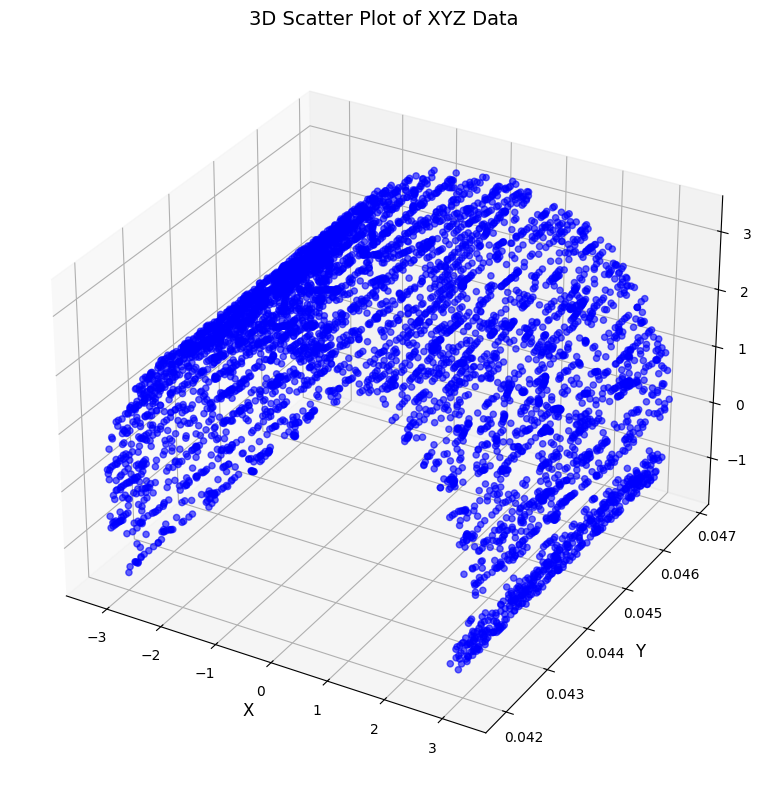

In [ ]:
# 4. Plot the data
fig1 = plt.figure(figsize=(10, 8))
ax1 = fig1.add_subplot(111, projection='3d')

# Create scatter plot
ax1.scatter(FE_df['X'], FE_df['Y'], FE_df['Z'], c='blue', marker='o', s=20, alpha=0.6)

# Labels and title
ax1.set_xlabel('X', fontsize=12)
ax1.set_ylabel('Y', fontsize=12)
ax1.set_zlabel('Z', fontsize=12)
ax1.set_title('3D Scatter Plot of XYZ Data', fontsize=14)

plt.tight_layout()
plt.show()

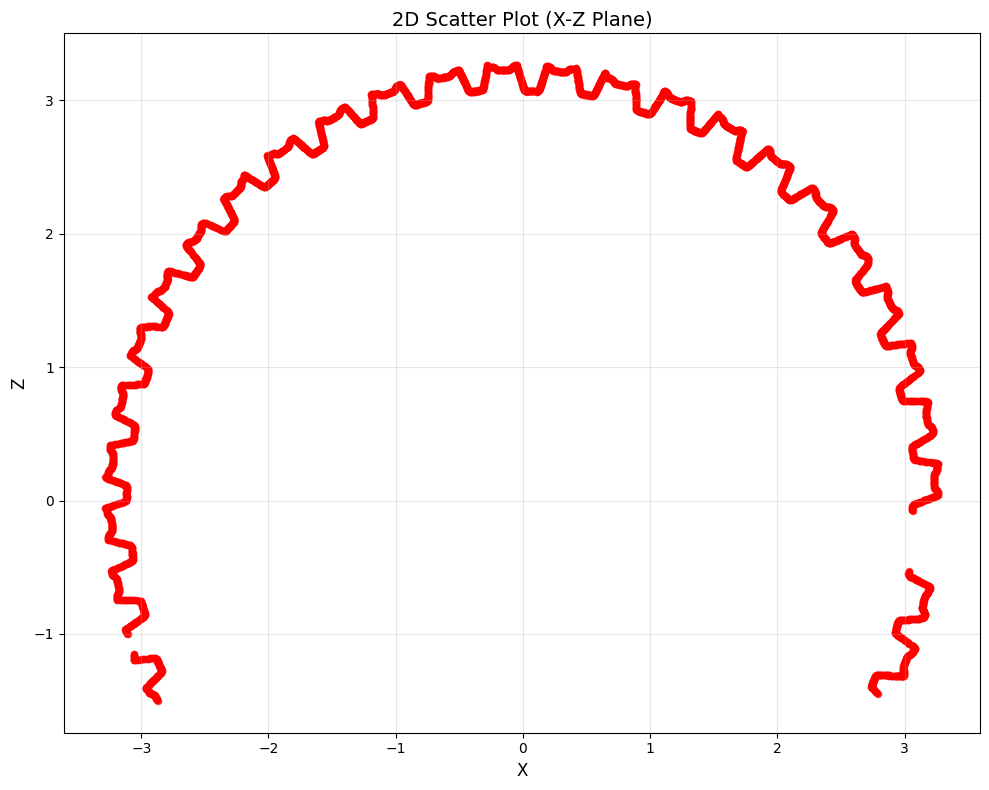

In [ ]:
# 2D Plot on X-Z plane
fig2 = plt.figure(figsize=(10, 8))
ax2 = fig2.add_subplot(111)
ax2.scatter(FE_df['X'], FE_df['Z'], c='red', marker='o', s=20, alpha=0.6)
ax2.set_xlabel('X', fontsize=12)
ax2.set_ylabel('Z', fontsize=12)
ax2.set_title('2D Scatter Plot (X-Z Plane)', fontsize=14)
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Converting all coordinates from m to mm.

In [ ]:
conversion_factor = 1000
FE_df[['X', 'Y', 'Z']] = FE_df[['X', 'Y', 'Z']] * conversion_factor
FE_df[['X', 'Y', 'Z']] = FE_df[['X', 'Y', 'Z']].round(2)

FE_df.head()

,X,Y,Z
0,-2170.00,42.75,2429.79
1,-2175.96,44.81,2433.82
2,-2223.02,46.51,2346.87
3,-2153.97,44.58,2419.80
4,-2221.02,46.42,2351.87


Finding the FE and DE Slice center by minimising variance of both together.

In [ ]:
def distance_spread_combined(center, points_DE, points_FE, weight_DE=1.0, weight_FE=1.0):
    """
    Calculate combined variance of distances for both DE and FE ends
    center: [x_center, z_center]
    points_DE: dataframe with X and Z columns for DE end
    points_FE: dataframe with X and Z columns for FE end
    weight_DE: weight for DE end variance
    weight_FE: weight for FE end variance
    """
    x_c, z_c = center

    # Calculate distances for DE end
    distances_DE = np.sqrt((DE_df['X'] - x_c)**2 + (DE_df['Z'] - z_c)**2)
    variance_DE = np.var(distances_DE)

    # Calculate distances for FE end
    distances_FE = np.sqrt((FE_df['X'] - x_c)**2 + (FE_df['Z'] - z_c)**2)
    variance_FE = np.var(distances_FE)

    # Combined objective: weighted sum of variances
    combined_variance = weight_DE * variance_DE + weight_FE * variance_FE

    return combined_variance


In [ ]:
# Initial guess for center (mean of X and Z)
initial_center = optimal_center
print(f"Initial Center: {initial_center[0]:.2f}, {initial_center[1]:.2f}")

Initial Center: 15.62, -3.66


In [ ]:
# Optimize to find individual optimal centers
result_DE = minimize(distance_spread, initial_center, args=(DE_df,), method='BFGS')
optimal_center_DE = result_DE.x

result_FE = minimize(distance_spread, initial_center, args=(FE_df,), method='BFGS')
optimal_center_FE = result_FE.x

# Optimize to find common optimal center
result_common = minimize(distance_spread_combined, initial_center,
                        args=(DE_df, FE_df, 1.0, 1.0), method='BFGS')
optimal_center_common = result_common.x

# Calculate statistics for all centers
def print_statistics(center, df_DE, df_FE, center_name):
    x_c, z_c = center

    # DE end statistics
    distances_DE = np.sqrt((df_DE['X'] - x_c)**2 + (df_DE['Z'] - z_c)**2)
    var_DE = np.var(distances_DE)
    std_DE = np.std(distances_DE)
    mean_DE = np.mean(distances_DE)
    min_DE = np.min(distances_DE)
    max_DE = np.max(distances_DE)

    # FE end statistics
    distances_FE = np.sqrt((df_FE['X'] - x_c)**2 + (df_FE['Z'] - z_c)**2)
    var_FE = np.var(distances_FE)
    std_FE = np.std(distances_FE)
    mean_FE = np.mean(distances_FE)
    min_FE = np.min(distances_FE)
    max_FE = np.max(distances_FE)

    print(f"\n{'='*80}")
    print(f"{center_name}")
    print(f"{'='*80}")
    print(f"Center: X = {x_c:.2f}, Z = {z_c:.2f}")
    print(f"\nDE End:")
    print(f"  Variance = {var_DE:.2f}")
    print(f"  Std Dev  = {std_DE:.2f}")
    print(f"  Mean Dist = {mean_DE:.2f}")
    print(f"  Min Dist  = {min_DE:.2f}")
    print(f"  Max Dist  = {max_DE:.2f}")
    print(f"\nFE End:")
    print(f"  Variance = {var_FE:.2f}")
    print(f"  Std Dev  = {std_FE:.2f}")
    print(f"  Mean Dist = {mean_FE:.2f}")
    print(f"  Min Dist  = {min_FE:.2f}")
    print(f"  Max Dist  = {max_FE:.2f}")
    print(f"\nCombined:")
    print(f"  Total Variance = {var_DE + var_FE:.2f}")
    print(f"  Average Variance = {(var_DE + var_FE)/2:.2f}")

    return distances_DE, distances_FE

# Print statistics for all three centers
distances_DE_opt_DE, distances_FE_opt_DE = print_statistics(optimal_center_DE, DE_df, FE_df,
                                                             "Optimal Center for DE End Only")
distances_DE_opt_FE, distances_FE_opt_FE = print_statistics(optimal_center_FE, DE_df, FE_df,
                                                             "Optimal Center for FE End Only")
distances_DE_common, distances_FE_common = print_statistics(optimal_center_common, DE_df, FE_df,
                                                            "Common Optimal Center (DE + FE)")



Optimal Center for DE End Only
Center: X = 15.62, Z = -3.66

DE End:
  Variance = 5235.61
  Std Dev  = 72.36
  Mean Dist = 3187.04
  Min Dist  = 3045.35
  Max Dist  = 3288.13

FE End:
  Variance = 5120.24
  Std Dev  = 71.56
  Mean Dist = 3188.08
  Min Dist  = 3045.11
  Max Dist  = 3317.48

Combined:
  Total Variance = 10355.85
  Average Variance = 5177.92

Optimal Center for FE End Only
Center: X = -14.14, Z = -9.47

DE End:
  Variance = 5600.38
  Std Dev  = 74.84
  Mean Dist = 3192.42
  Min Dist  = 3034.04
  Max Dist  = 3311.03

FE End:
  Variance = 4887.20
  Std Dev  = 69.91
  Mean Dist = 3190.88
  Min Dist  = 3066.89
  Max Dist  = 3293.82

Combined:
  Total Variance = 10487.58
  Average Variance = 5243.79

Common Optimal Center (DE + FE)
Center: X = 2.51, Z = -2.89

DE End:
  Variance = 5269.35
  Std Dev  = 72.59
  Mean Dist = 3187.67
  Min Dist  = 3044.90
  Max Dist  = 3293.54

FE End:
  Variance = 4904.74
  Std Dev  = 70.03
  Mean Dist = 3187.64
  Min Dist  = 3052.15
  Max Dist  

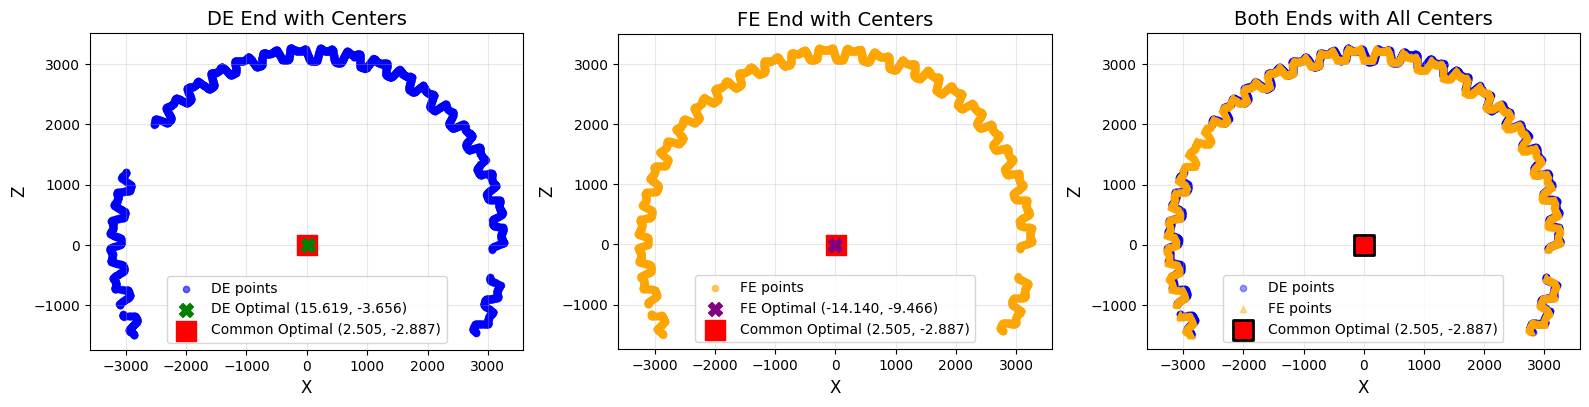

In [ ]:
# Visualize all centers on X-Z plane
fig3 = plt.figure(figsize=(16, 6))

# Subplot 1: DE End
ax1 = fig3.add_subplot(131)
ax1.scatter(DE_df['X'], DE_df['Z'], c='blue', marker='o', s=20, alpha=0.6, label='DE points')
ax1.scatter(optimal_center_DE[0], optimal_center_DE[1], c='green', marker='X', s=100,
           label=f'DE Optimal ({optimal_center_DE[0]:.3f}, {optimal_center_DE[1]:.3f})', zorder=5)
ax1.scatter(optimal_center_common[0], optimal_center_common[1], c='red', marker='s', s=200,
           label=f'Common Optimal ({optimal_center_common[0]:.3f}, {optimal_center_common[1]:.3f})', zorder=2)
ax1.set_xlabel('X', fontsize=12)
ax1.set_ylabel('Z', fontsize=12)
ax1.set_title('DE End with Centers', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_aspect('equal', adjustable='box')

# Subplot 2: FE End
ax2 = fig3.add_subplot(132)
ax2.scatter(FE_df['X'], FE_df['Z'], c='orange', marker='o', s=20, alpha=0.6, label='FE points')
ax2.scatter(optimal_center_FE[0], optimal_center_FE[1], c='purple', marker='X', s=100,
           label=f'FE Optimal ({optimal_center_FE[0]:.3f}, {optimal_center_FE[1]:.3f})', zorder=5)
ax2.scatter(optimal_center_common[0], optimal_center_common[1], c='red', marker='s', s=200,
           label=f'Common Optimal ({optimal_center_common[0]:.3f}, {optimal_center_common[1]:.3f})', zorder=2)
ax2.set_xlabel('X', fontsize=12)
ax2.set_ylabel('Z', fontsize=12)
ax2.set_title('FE End with Centers', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_aspect('equal', adjustable='box')

# Subplot 3: Both ends overlaid
ax3 = fig3.add_subplot(133)
ax3.scatter(DE_df['X'], DE_df['Z'], c='blue', marker='o', s=20, alpha=0.4, label='DE points')
ax3.scatter(FE_df['X'], FE_df['Z'], c='orange', marker='^', s=20, alpha=0.4, label='FE points')
# ax3.scatter(optimal_center_DE[0], optimal_center_DE[1], c='green', marker='X', s=150,
#           label=f'DE Only', zorder=5)
# ax3.scatter(optimal_center_FE[0], optimal_center_FE[1], c='purple', marker='X', s=150,
#           label=f'FE Only', zorder=5)
ax3.scatter(optimal_center_common[0], optimal_center_common[1], c='red', marker='s', s=200,
           label=f'Common Optimal ({optimal_center_common[0]:.3f}, {optimal_center_common[1]:.3f})', zorder=2, edgecolors='black', linewidths=2)
ax3.set_xlabel('X', fontsize=12)
ax3.set_ylabel('Z', fontsize=12)
ax3.set_title('Both Ends with All Centers', fontsize=14)
ax3.grid(True, alpha=0.3)
ax3.legend()
ax3.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

In [ ]:
# Ending the runtime
total = sum(range(1000000))
end = time.perf_counter()

print(f"Runtime: {end - start:.4f} seconds")

Runtime: 5.8520 seconds
